Confusion Matrix:
[[ 6  2]
 [ 1 11]]
Accuracy: 0.85
Precision: 0.8461538461538461
Recall: 0.9166666666666666
F1 Score: 0.8799999999999999


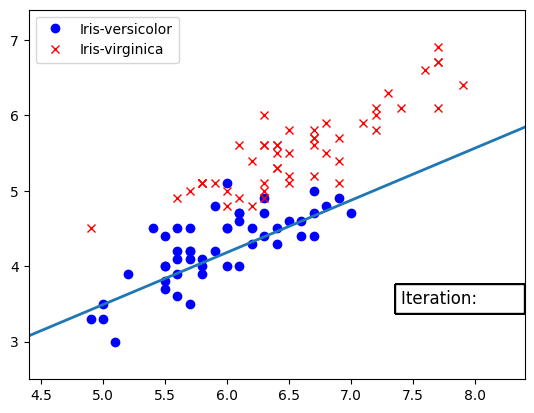

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.animation import FuncAnimation
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

class Perceptron():
    #initialize hyperparameters (learning rate and number of iterations)
    def __init__(self, eta=0.1, n_iter=50, nameA='', nameB=''):
        self.eta = eta
        self.n_iter = n_iter
        self.nameA = nameA
        self.nameB = nameB

    def step_fit(self, X, y):
        self.w_ = np.random.uniform(-1, 1, size=X.shape[1] + 1)  # Initialize weights
        for _ in range(self.n_iter):
            for xi, label in zip(X, y):
                update = self.eta * (label - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
        return self

    # compute the net input i.e scalar sum of X and the weights plus the bias value
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # predict a classification for a sample of features X
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def init_plot(self):
        self.line.set_data([], [])
        return self.line,

    def animate(self, iteration_number, X, y):
        self.step_fit(X, y)
        x, y = self.plot_line(X)
        self.line.set_data(x, y)
        if iteration_number % 2 == 0:
            self.ax.text(max(X[:, 0]) - 0.5, min(X[:, 1]) + 0.5, f'Iteration: {iteration_number}', fontsize=12)
        else:
            self.ax.text(max(X[:, 0]) - 0.5, min(X[:, 1]) + 0.5, 'Iteration:' + ' ' * 8, fontsize=12,
                         bbox=dict(facecolor='white', alpha=1))
        return self.line,

    def plot_line(self, X):
        x = []
        y = []
        slope = -(self.w_[0] / self.w_[2]) / (self.w_[0] / self.w_[1])
        intercept = -self.w_[0] / self.w_[2]
        for i in np.linspace(np.amin(X[:, 0]) - 0.5, np.amax(X[:, 0]) + 0.5):
            # y=mx+c, m is slope and c is intercept
            x.append(i)
            y.append((slope * i) + intercept)
        return x, y

    def animated_fit(self, X, y):
        # here figure must be defined as a variable so it can be passed to FuncAnimation
        self.fig = plt.figure()

        # setting x and y limits with a 0.5 offset
        self.ax = plt.axes(xlim=(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5), ylim=(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5))

        # plotting our training points
        self.ax.plot(X[0:50, 0], X[0:50, 1], "bo", label=self.nameA)
        self.ax.plot(X[50:100, 0], X[50:100, 1], "rx", label=self.nameB)

        # labelling
        self.ax.legend(loc='upper left')

        # initialization of separation line and our animation object
        self.line, = self.ax.plot([], [], lw=2)
        anim = FuncAnimation(self.fig, self.animate, init_func=self.init_plot, fargs=(X, y,), frames=self.n_iter,
                             interval=200, blit=True)
        anim.save('learning_process.gif', writer='imagemagick')

    def evaluate(self, x, y):
        y_pred = self.predict(x)
        confusion = confusion_matrix(y, y_pred)
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        print("Confusion Matrix:")
        print(confusion)
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)

# import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

SPECIES_1 = {'name': "Iris-setosa", 's': 0, 'end': 50}  # 0:50 # small size
SPECIES_2 = {'name': "Iris-versicolor", 's': 50, 'end': 100}  # 50:100
SPECIES_3 = {'name': "Iris-virginica", 's': 100, 'end': 150}  # 100:150
spA, spB = SPECIES_2, SPECIES_3

# preparing our data to be understood by our model
X = df.iloc[np.r_[spA['s']:spA['end'], spB['s']:spB['end']], [0, 2]].values
y = df.iloc[np.r_[spA['s']:spA['end'], spB['s']:spB['end']], 4].values
y = np.where(y == spB['name'], -1, 1)

ppn = Perceptron(eta=0.1, n_iter=150, nameA=spA['name'], nameB=spB['name'])
ppn.animated_fit(X, y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the perceptron model
ppn = Perceptron(eta=0.1, n_iter=150, nameA=spA['name'], nameB=spB['name'])
ppn.step_fit(X_train, y_train)

# Evaluate on validation set
ppn.evaluate(X_val, y_val)
